In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #for data visualisation
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

In [3]:
train_og = train.copy()
test_og = test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape, test.shape

((614, 13), (367, 12))

In [8]:
#UNIVARIATE ANALYSIS

#Count of each category in that variable: Target Variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
#Nomalize set to True to print proportions
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

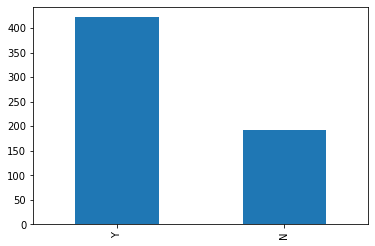

In [10]:
train['Loan_Status'].value_counts().plot.bar()

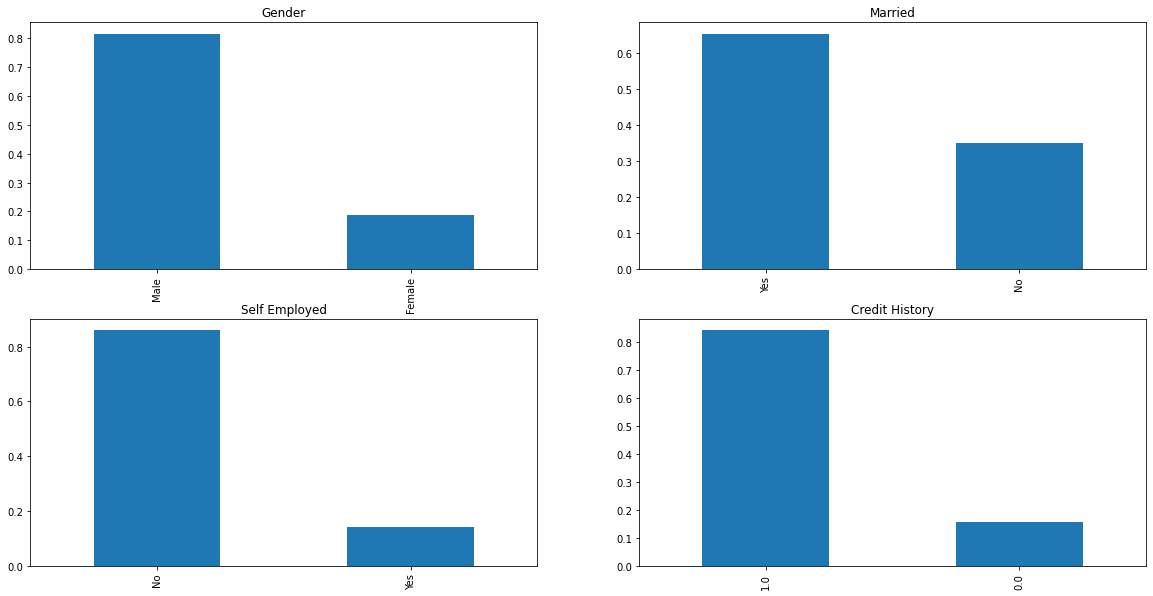

In [11]:
#Independent Variables: Categorical

plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize = (20, 10), title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title = 'Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize = (20, 10), title = 'Credit History')
plt.show()

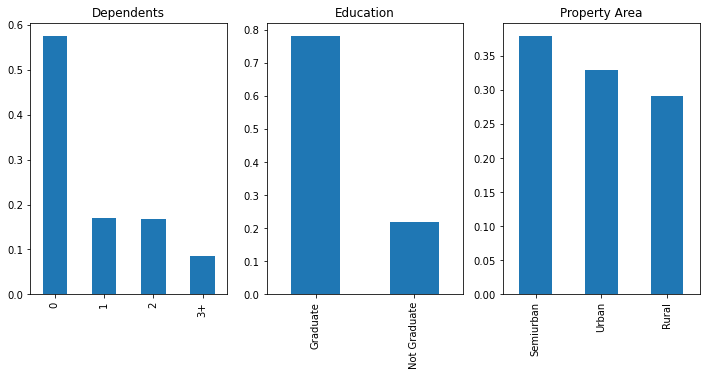

In [12]:
#Independent Variables: Categorical

plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize = (12, 5), title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title = 'Property Area')
plt.show()

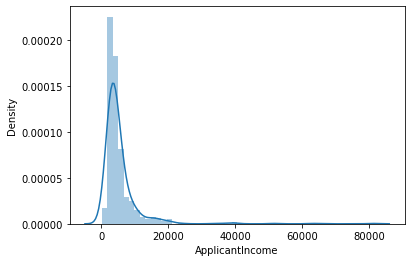

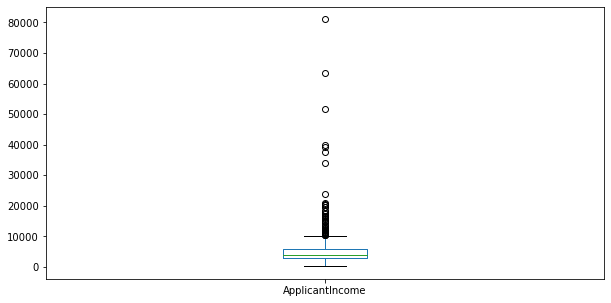

In [13]:
#Independent Variables: Numerical

sns.distplot(train['ApplicantIncome']); 
#Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations.
plt.show()
train['ApplicantIncome'].plot.box(figsize = (10,5))
plt.show() #Not needed in interactive notebook like Jupyter, otherwise essential

Text(0.5, 0.98, '')

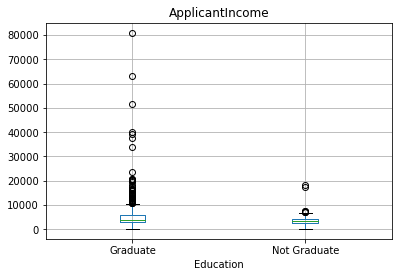

In [14]:
#Segregating Applicant Income by Education

train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("") #Add a centered title to the figure.

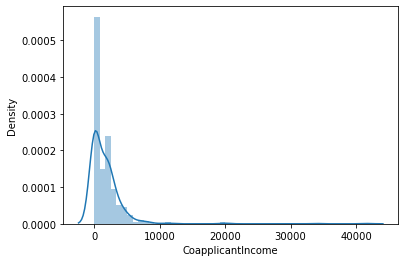

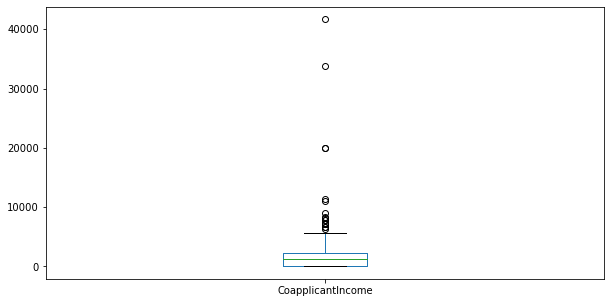

In [15]:
sns.distplot(train['CoapplicantIncome']); 
#Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations.
plt.show()
train['CoapplicantIncome'].plot.box(figsize = (10,5))
plt.show() #Not needed in interactive notebook like Jupyter, otherwise essential

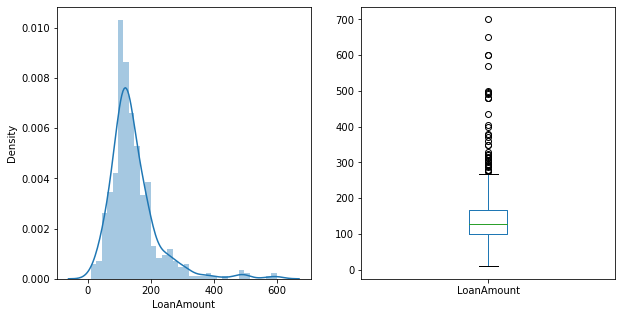

In [16]:
plt.figure(1) 
plt.subplot(121)
df = train.dropna() # used to remove missing values.
sns.distplot(df['LoanAmount']);
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(10,5))
plt.show()

<AxesSubplot:xlabel='Education'>

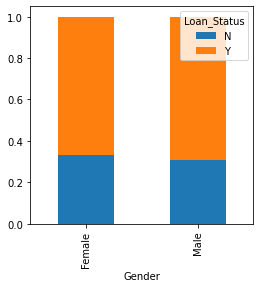

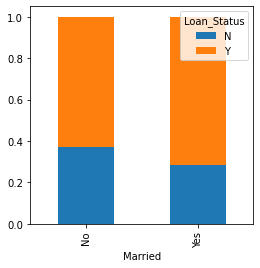

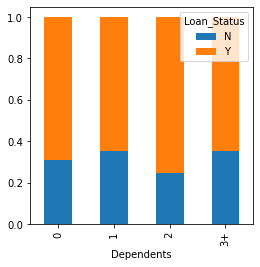

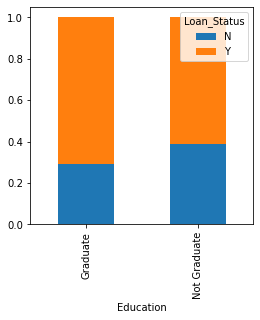

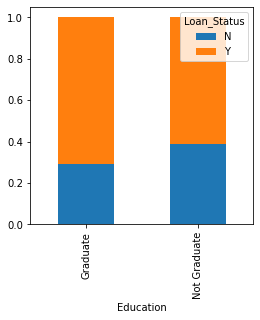

In [17]:
#BIVARIATE ANALYSIS: to test hypotheses

#Categorical Independent Variable v/s Target Variable

Gender=pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

Self_Employed = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

# crosstab computes a simple cross tabulation of two (or more) factors, by default computes a frequency table of the factors 
#df.div(..., axis): For Series input, axis to match Series index on
#df.sum: Returns the sum of the values for the requested axis
#“axis 0” represents rows and “axis 1” represents columns.

<AxesSubplot:xlabel='Loan_Status'>

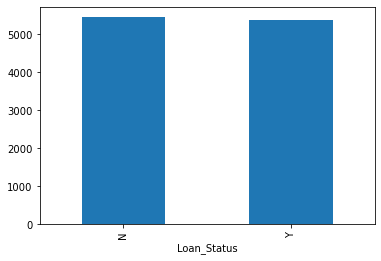

In [18]:
#Numerical Independent Variable v/s Target Variable

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

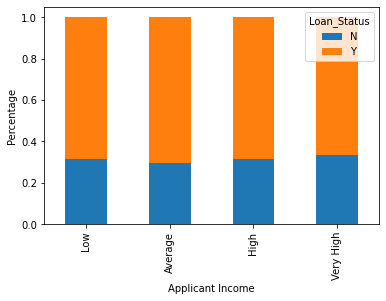

In [19]:
#Mean income not too different. Therefore, creating bins.

bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']

train['Income_Bin'] = pd.cut(train['ApplicantIncome'], bins, labels = group)

Income_Bin = pd.crosstab(train['Income_Bin'], train['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

plt.xlabel('Applicant Income')
plt.ylabel('Percentage')


Text(0, 0.5, 'Percentage')

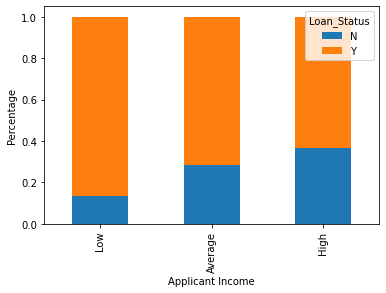

In [20]:
bins = [0, 1000, 5000, 42000]
group = ['Low', 'Average', 'High']

train['Coapplicant_Income_Bin'] = pd.cut(train['CoapplicantIncome'], bins, labels = group)

Coapplicant_Income_Bin = pd.crosstab(train['Coapplicant_Income_Bin'], train['Loan_Status'])
Coapplicant_Income_Bin.div(Coapplicant_Income_Bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

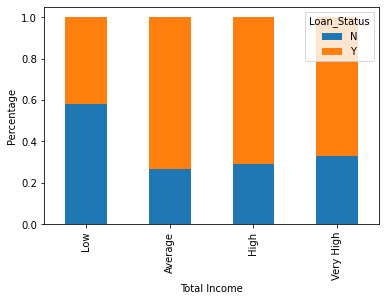

In [21]:
#Combination

train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']

train['Total_Income_Bin'] = pd.cut(train['Total_Income'], bins, labels = group)

Total_Income_Bin = pd.crosstab(train['Total_Income_Bin'], train['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

plt.xlabel('Total Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

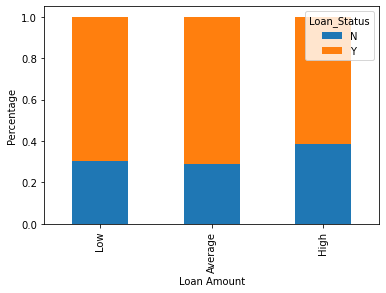

In [22]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']

train['LoanAmount_Bin'] = pd.cut(train['LoanAmount'], bins, labels = group)
#cut => cut into bins. qcut to cut into quartiles

LoanAmount_Bin = pd.crosstab(train['LoanAmount_Bin'], train['Loan_Status'])
LoanAmount_Bin.div(LoanAmount_Bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

In [23]:
#Drop bins that were created for exploration

train = train.drop(['Income_Bin','Coapplicant_Income_Bin', 'LoanAmount_Bin', 'Total_Income','Total_Income_Bin'], axis = 1)

In [24]:
# Convert 3+ in Dependents variable to 3 to make it numeric
train['Dependents'].replace('3+','3', inplace = True)
test['Dependents'].replace('3+','3', inplace = True)

#Replace loan status with 0 and 1
train['Loan_Status'].replace('N','0', inplace = True)
train['Loan_Status'].replace('Y','1', inplace = True)

#When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now overwriitten. 
#When inplace = False , which is the default, then the operation is performed and it returns a copy of the object to preserve original.

<AxesSubplot:>

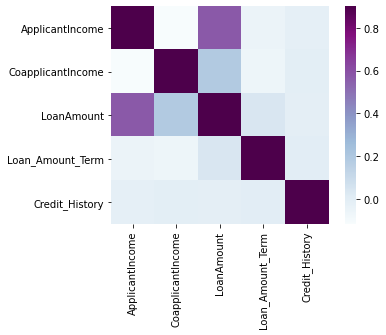

In [25]:
#Co-Relation

matrix = train.corr()
sns.heatmap(matrix, vmax = 0.9, square = True, cmap = "BuPu")

#vmax to anchor the range of values for colourmap, optional.
#cmap for colour

In [26]:
#Missing values

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
#Replacing null values for categorical variables with mean

train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

#just mode() gives multiple values, mode()[0] gives single value, i.e. the first mode

In [28]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [29]:
#replacing missing values with mode of loan amount term  
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

In [30]:
#Numerical variable with mean or median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [31]:
#Check
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
#Cleaning test dataset
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [33]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

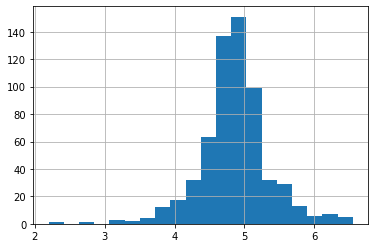

In [34]:
#Outliers in Loan Amount: log transformation

# plt.hist(train['LoanAmount']) will show positive skewness

train['Loan_Amount_log'] = np.log(train['LoanAmount'])
test['Loan_Amount_log'] = np.log(test['LoanAmount'])

train['Loan_Amount_log'].hist(bins=20)

In [35]:
#MODEL BUILDING

train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)


In [36]:
#Target variable in separate data set

x = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [37]:
#Dummy variables for categorical variables

x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

#The get_dummies() function is used to convert categorical variable into dummy/indicator variables

In [38]:
#Split training dataset further into training and test(to validate)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 1)

#Setting random_state a fixed value will guarantee that the same sequence of random numbers is generated each time you run the code.
#test_size: represents the proportion of the dataset to include in the test split. default = 0.25

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [46]:
#c represents inverse of regularization strength

In [47]:
#Prediction Time

pred_cv = model.predict(x_test)

In [48]:
#Accuracy Check

accuracy_score(y_test, pred_cv)

0.7945945945945946

In [55]:
#Logistic Regression using stratified k-folds cross validation
from sklearn.model_selection import StratifiedKFold

#Making a cross validation logustic model with 5 folds and make predictions for the test dataset

i=1
mean = 0
k = StratifiedKFold (n_splits = 5, random_state = 1, shuffle = True)

for train_index,test_index in k.split(x,y):
    print ('\n{} of kfold {}'.format(i,k.n_splits))
    
    xtr,xvl = x.iloc[train_index], x.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(random_state = 1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean = mean + score
    print('Accuracy score:', score)
    i = i + 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print ('\n Mean Validation Accuracy:', mean/(i-1))


1 of kfold 5
Accuracy score: 0.8048780487804879

2 of kfold 5
Accuracy score: 0.8373983739837398

3 of kfold 5
Accuracy score: 0.7804878048780488

4 of kfold 5
Accuracy score: 0.7886178861788617

5 of kfold 5
Accuracy score: 0.7950819672131147

 Mean Validation Accuracy: 0.8012928162068507
